## Step one: Get the data from the FCC FM radio query
There are lots of options but I queried a text file with all radio stations. The columns are given by the "FCC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


this time around I will download 2 seperate queries (commericial and nonprofit)
Thank you to https://simplemaps.com/data/us-cities


In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
column_names = ['z',
                'Callsign',
                'Frequency',
                'Service',
                'Channel', # mixed data types?
                'DA or ND' ,
                'w',
                'FM Station Class',
                'y',
                'FM Status',
                'City',
                'State',
                'Country',
                'File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)',
                'Effective Radiated Power horizontally',
                'Effective Radiated Power vertically',
                'Antenna Height Above Average Terrain (HAAT) -- horizontal polarization',
                'Antenna Height Above Average Terrain (HAAT) -- vertical polarization',
                'Facility ID Number (unique to each station)',
                'N (North) or S (South) Latitude',
                'Degrees Latitude',# mixed data types?
                'Minutes Latitude',# mixed data types?
                'Seconds Latitude',# mixed data types?
                'W (West) or (E) East Longitude',
                'Degrees Longitude',# mixed data types?
                'Minutes Longitude',# mixed data types?
                'Seconds Longitude',# mixed data types?
                'Licensee or Permittee',
                'Kilometers distant (radius) from entered latitude, longitude',
                'Miles distant (radius) from entered latitude, longitude',
                'Azimuth, looking from center Lat, Lon to this records Lat, Lon',
                'Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters',
                'Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters',
                'Directional Antenna ID Number',   
                'Directional Antenna Pattern Rotation (degrees)',            
                'Antenna Structure Registration Number',
                'Height of antenna radiation center above ground level (maximum) (physical center of the antenna)',
                'Application ID number (from CDBS database)',
                'LMS Application ID',
                'x']


In [4]:
# read in data. it is a pipe delimited text file 'data/fcc_fm_query.txt' with no header
# df = pd.read_csv('../data/fcc_fm_commercial.txt', sep='|', header=None)
# df.head()


# ParserError: Error tokenizing data. C error: Expected 28 fields in line 475, saw  ----40 


Bad encoding. A new line was placed after owner columns ending with a ',' it seems. '\n ' can be replace as the new rows started with a '\n|' 

In [5]:
# # Read the content of the text file
# with open('../data/fcc_fm_commercial.txt', 'r') as file:
#     data = file.read()

# # Remove new lines within rows 
# cleaned_data = data.replace('\n ', '')

# # Write the cleaned data back to the file
# with open('../data/fcc_fm_commercial_cleaned.txt', 'w') as file:
#     file.write(cleaned_data)

### Here is a dataframe of Commercial Stations needing to be cleaned up

In [6]:
# Read the cleaned data back into a dataframe with column names
commercial = pd.read_csv('../data/fcc_fm_commercial_cleaned.txt', sep='|', header=None, names=column_names)
commercial.head()

,z,Callsign,Frequency,Service,Channel,DA or ND,w,FM Station Class,y,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),N (North) or S (South) Latitude,Degrees Latitude,Minutes Latitude,Seconds Latitude,W (West) or (E) East Longitude,Degrees Longitude,Minutes Longitude,Seconds Longitude,Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID,x
0,NaN,K201CL,88.1 MHz,FX,201,ND,-,D,-,LIC,TATITLEK,AK,US,BLFT-20101001AHK,-. kW,0.023 kW,0.0,0.0,65237,N,60,52,6.0,W,146,40,54.2,"TERMINAL RADIO, INC. ...",0.00 km,0.00 mi,0.00 deg,0.0 m,42. m,31326,-,-,12. m,1364607,a751fb3559f54d08aef5c1b6063ebeb7,NaN
1,NaN,WSJL,88.1 MHz,FM,201,DA,-,A,-,LIC,BESSEMER,AL,US,BLED-20130322AHX,-. kW,6. kW,0.0,98.0,88660,N,33,23,45.4,W,87,1,7.0,"ELIJAH RADIO, INC. ...",0.00 km,0.00 mi,0.00 deg,0.0 m,254. m,13374,0.,1019712,66. m,1564228,4974067c949a4731af1ec1b6063ebeb7,NaN
2,NaN,KBAP,88.1 MHz,FM,201,ND,-,A,-,LIC,BATESVILLE,AR,US,BLED-20101213AHT,0.25 kW,-. kW,39.0,0.0,175536,N,35,47,52.2,W,91,40,16.5,TONY V. HAMMACK MINISTRIES ...,0.00 km,0.00 mi,0.00 deg,181. m,0.0 m,-,-,-,17. m,1411889,8f5d3abb1cb142f08aefc1b6063ebeb7,NaN
3,NaN,K201ER,88.1 MHz,FX,201,ND,-,D,-,LIC,HOLBROOK,AZ,US,BLFT-20000128ADH,0.05 kW,0.05 kW,29.0,0.0,89665,N,34,55,5.1,W,110,8,27.4,"ADVANCE MINISTRIES, INC. D/B/A/ NEW LIFE CHRIS...",0.00 km,0.00 mi,0.00 deg,1624. m,1624.0 m,30889,-,1002376,30. m,492632,95888c9301ea4b3a9fbcc1b6063ebeb7,NaN
4,NaN,KECG,88.1 MHz,FM,201,ND,-,D,-,LIC,EL CERRITO,CA,US,BLED-20050727AAH,0.017 kW,0.017 kW,-29.0,-29.0,19081,N,37,54,19.7,W,122,17,37.8,WEST CONTRA COSTA UNIFIED SCHOOL DISTRICT ...,0.00 km,0.00 mi,0.00 deg,63. m,63.0 m,-,-,-,29. m,1076164,8d79f211f9c44b71bec3c1b6063ebeb7,NaN


In [7]:
# # now with the edu stations
# # Read the content of the text file
# with open('../data/fcc_fm_edu.txt', 'r') as file:
#     data = file.read()

# # Remove new lines within rows 
# cleaned_data = data.replace('\n ', '')

# # Write the cleaned data back to the file
# with open('../data/fcc_fm_edu_cleaned.txt', 'w') as file:
#     file.write(cleaned_data)



### Education stations

In [8]:
edu = pd.read_csv('../data/fcc_fm_edu_cleaned.txt', sep='|', header=None, names=column_names)
edu.head()

C:\Users\seanh\AppData\Local\Temp\ipykernel_33196\4029708489.py:1: DtypeWarning: Columns (20,21,22,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  edu = pd.read_csv('../data/fcc_fm_edu_cleaned.txt', sep='|', header=None, names=column_names)


,z,Callsign,Frequency,Service,Channel,DA or ND,w,FM Station Class,y,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),N (North) or S (South) Latitude,Degrees Latitude,Minutes Latitude,Seconds Latitude,W (West) or (E) East Longitude,Degrees Longitude,Minutes Longitude,Seconds Longitude,Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID,x
0,NaN,KKQA,88.1 MHz,FM,201,ND,-,D,-,CP,AKUTAN,AK,US,0000121886,0.09 kW,0.09 kW,-102.0,-102.0,757242,N,54,8,6,W,165,46,22,"ALEUTIAN PENINSULA BROADCASTING, INC. ...",0.00 km,0.00 mi,0.00 deg,26. m,26.0 m,6902019008006,-,-,13. m,2037197,25076f917493d0500174997ff17f0327,NaN
1,NaN,KRUA,88.1 MHz,FM,201,ND,-,A,-,LIC,ANCHORAGE,AK,US,0000207895,0.32 kW,0.32 kW,297.0,297.0,69007,N,61,20,8.8,W,149,30,56.2,UNIVERSITY OF ALASKA ...,0.00 km,0.00 mi,0.00 deg,619. m,619.0 m,1010404,-,1204036,41. m,207895,25076f9185631e9b01858312701405a6,NaN
2,NaN,K201CH,88.1 MHz,FX,201,ND,-,D,-,LIC,CHENEGA BAY,AK,US,BLFT-19931004TF,-. kW,0.021 kW,0.0,-136.0,65234,N,60,3,54.7,W,148,0,44.3,"TERMINAL RADIO, INC. ...",0.00 km,0.00 mi,0.00 deg,0.0 m,26. m,-,-,-,0. m,190597,12cd8e4135cd45eb851ac1b6063ebeb7,NaN
3,NaN,KCUK,88.1 MHz,FM,201,ND,-,A,-,STA,CHEVAK,AK,US,0000201689,0.2 kW,0.2 kW,15.0,15.0,33453,N,61,31,52.3,W,165,35,07.9,KASHUNAMIUT SCHOOL DISTRICT ...,0.00 km,0.00 mi,0.00 deg,21. m,21.0 m,6902019008006,-,-,15. m,201689,25076ff3838b52d501838bd6953d0000,NaN
4,NaN,KCUK,88.1 MHz,FM,201,ND,-,A,-,STA,CHEVAK,AK,US,0000203543,0.15 kW,0.15 kW,14.0,14.0,33453,N,61,31,18.4,W,166,5,46.7,KASHUNAMIUT SCHOOL DISTRICT ...,0.00 km,0.00 mi,0.00 deg,14. m,14.0 m,6902019008006,-,-,12. m,203543,25076f9184355aa301845281efdc05ba,NaN


In [9]:
# drop x,y,z,w columns
commercial.drop(columns=['x','y','z','w'], inplace=True)
edu.drop(columns=['x','y','z','w'], inplace=True)

Nulls?

In [10]:
commercial.info() # 1 null lat long

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12163 entries, 0 to 12162
Data columns (total 36 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Callsign                                                                                          12163 non-null  object
 1   Frequency                                                                                         12163 non-null  object
 2   Service                                                                                           12163 non-null  object
 3   Channel                                                                                           12163 non-null  int64 
 4   DA or ND                                                                                          12163 non-null  object
 5   FM S

In [11]:
edu.info() # 8 null lat long

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18086 entries, 0 to 18085
Data columns (total 36 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Callsign                                                                                          18086 non-null  object
 1   Frequency                                                                                         18086 non-null  object
 2   Service                                                                                           18086 non-null  object
 3   Channel                                                                                           18086 non-null  int64 
 4   DA or ND                                                                                          18086 non-null  object
 5   FM S

In [12]:
commercial[commercial['Degrees Latitude'].isnull()] # encoding error....

,Callsign,Frequency,Service,Channel,DA or ND,FM Station Class,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),N (North) or S (South) Latitude,Degrees Latitude,Minutes Latitude,Seconds Latitude,W (West) or (E) East Longitude,Degrees Longitude,Minutes Longitude,Seconds Longitude,Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID


In [13]:
edu.sample(5)

,Callsign,Frequency,Service,Channel,DA or ND,FM Station Class,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),N (North) or S (South) Latitude,Degrees Latitude,Minutes Latitude,Seconds Latitude,W (West) or (E) East Longitude,Degrees Longitude,Minutes Longitude,Seconds Longitude,Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID
2401,K207EW,89.3 MHz,FX,207,ND,D,STA,MITCHELL,SD,US,0000208694,0.25 kW,0.25 kW,74.1,0.0,93575,N,43,42,2.6,W,97,56,9.7,"FAMILY WORSHIP CENTER CHURCH, INC. ...",0.00 km,0.00 mi,0.00 deg,470.1 m,470.1 m,105465,-,1055713,48. m,208694,25076ff385eac8050185ef37aea100f4
11449,KTIS-FM,98.5 MHz,FM,253,ND,C0,LIC,MINNEAPOLIS,MN,US,BMLED-20030304AAJ,100. kW,100. kW,315.0,315.0,49787,N,45,3,29.9,W,93,7,27.8,UNIVERSITY OF NORTHWESTERN-ST. PAUL ...,0.00 km,0.00 mi,0.00 deg,593. m,593.0 m,-,-,1022899,316. m,628912,4bb87ca9e09f4178bd8dc1b6063ebeb7
4618,KGBV,90.7 MHz,FM,214,ND,A,LIC,HARDIN,TX,US,BLED-20100201AGY,0.1 kW,0.1 kW,13.0,13.0,93440,N,30,9,23.7,W,94,44,20.2,"BEST MEDIA, INC. ...",0.00 km,0.00 mi,0.00 deg,27.8 m,27.8 m,-,-,-,10.7 m,1355551,aa1ae7d8751a4a34ad8ec1b6063ebeb7
7735,W227AF,93.3 MHz,FX,227,ND,D,LIC,MELBOURNE,FL,US,BLFT-19960409TA,-. kW,0.055 kW,0.0,59.0,9872,N,28,8,15.0,W,80,42,10.1,"CENTRAL EDUCATIONAL BROADCASTING, INC. ...",0.00 km,0.00 mi,0.00 deg,0.0 m,62. m,-,-,-,55. m,223358,8ecd697eed384cfd90e4c1b6063ebeb7
1910,KAWS,89.1 MHz,FS,206,ND,C3,LIC,MURPHY,ID,US,BXLED-20080214AHE,-. kW,0.36 kW,0.0,681.5,8417,N,43,0,24.6,W,116,42,16.4,CSN INTERNATIONAL ...,0.00 km,0.00 mi,0.00 deg,0.0 m,2480. m,-,-,1064242,26. m,1234650,74641088145443d99572c1b6063ebeb7


### Longitude and latitude are denoted by how many columns!!
                ['N (North) or S (South) Latitude',
                'Degrees Latitude',
                'Minutes Latitude',
                'Seconds Latitude',
                'W (West) or (E) East Longitude',
                'Degrees Longitude',
                'Minutes Longitude',
                'Seconds Longitude']

In [14]:
# where is the longitude or latitude null?
edu[edu['Degrees Latitude'].isnull()]

,Callsign,Frequency,Service,Channel,DA or ND,FM Station Class,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),N (North) or S (South) Latitude,Degrees Latitude,Minutes Latitude,Seconds Latitude,W (West) or (E) East Longitude,Degrees Longitude,Minutes Longitude,Seconds Longitude,Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID


In [15]:
# Latitude and Longitude are in Degrees Minutes Seconds format (DMS).
# Convert to decimal degrees (DD) 
# first make them numeric
columns = ['Degrees Latitude', 'Minutes Latitude', 'Seconds Latitude', 
           'Degrees Longitude', 'Minutes Longitude', 'Seconds Longitude']
# data types for these 
commercial[columns].dtypes        

Degrees Latitude     object
Minutes Latitude     object
Seconds Latitude     object
Degrees Longitude    object
Minutes Longitude    object
Seconds Longitude    object
dtype: object

In [16]:
commercial['Degrees Latitude'].value_counts() 

40     853
41     798
39     792
42     725
34     704
35     699
37     643
43     621
38     604
36     587
33     586
32     570
44     555
45     457
30     400
46     368
31     349
29     263
47     225
49     196
48     154
28     151
27     149
18     123
26     118
25      92
21      59
50      48
51      41
61      28
20      27
24      25
17      25
19      22
54      15
64      15
13      13
60      13
14       6
16       5
59       5
55       5
23       4
67       4
58       4
68       3
53       3
15       3
57       3
62       1
22       1
66       1
-        1
52       1
Name: Degrees Latitude, dtype: int64

In [17]:
# Brute force them to be numeric
commercial['Degrees Latitude'] = pd.to_numeric(commercial['Degrees Latitude'], errors='coerce')
commercial['Minutes Latitude'] = pd.to_numeric(commercial['Minutes Latitude'], errors='coerce')
commercial['Seconds Latitude'] = pd.to_numeric(commercial['Seconds Latitude'], errors='coerce')
commercial['Degrees Longitude'] = pd.to_numeric(commercial['Degrees Longitude'], errors='coerce')
commercial['Minutes Longitude'] = pd.to_numeric(commercial['Minutes Longitude'], errors='coerce')
commercial['Seconds Longitude'] = pd.to_numeric(commercial['Seconds Longitude'], errors='coerce')


In [18]:
commercial[columns].dtypes # now they are numeric

Degrees Latitude     float64
Minutes Latitude     float64
Seconds Latitude     float64
Degrees Longitude    float64
Minutes Longitude    float64
Seconds Longitude    float64
dtype: object

In [19]:
edu['Degrees Latitude'] = pd.to_numeric(edu['Degrees Latitude'], errors='coerce') 
edu['Minutes Latitude'] = pd.to_numeric(edu['Minutes Latitude'], errors='coerce')
edu['Seconds Latitude'] = pd.to_numeric(edu['Seconds Latitude'], errors='coerce')
edu['Degrees Longitude'] = pd.to_numeric(edu['Degrees Longitude'], errors='coerce')
edu['Minutes Longitude'] = pd.to_numeric(edu['Minutes Longitude'], errors='coerce')
edu['Seconds Longitude'] = pd.to_numeric(edu['Seconds Longitude'], errors='coerce')

In [20]:
edu[columns].dtypes # now they are numeric  

Degrees Latitude     float64
Minutes Latitude     float64
Seconds Latitude     float64
Degrees Longitude    float64
Minutes Longitude    float64
Seconds Longitude    float64
dtype: object

#### Whitespace everywhere!
I need to strip pretty much every object columns of its white space

In [21]:
def whitespace_remover(dataframe):
    # iterating over the columns
    for i in dataframe.columns:   
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':       
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:   
            # if condn. is False then it will do nothing.
            pass
# applying whitespace_remover function on dataframe
whitespace_remover(commercial)
whitespace_remover(edu)

In [22]:
lat_long_cols= ['N (North) or S (South) Latitude',
                'Degrees Latitude',
                'Minutes Latitude',
                'Seconds Latitude',
                'W (West) or (E) East Longitude',
                'Degrees Longitude',
                'Minutes Longitude',
                'Seconds Longitude']

In [23]:
# drop the columns with na values for lat long  - those are all incomplete records or applications it seems
commercial.dropna(subset=columns, inplace=True)
edu.dropna(subset=columns, inplace=True)


In [24]:
def convert_to_decimal(df, lat_columns, lon_columns):
    df['lat_decimal'] = np.where(df[lat_columns[0]] == 'N',df.apply(lambda row: row[lat_columns[1]] + row[lat_columns[2]]/60 + row[lat_columns[3]]/3600, axis=1),
                                 -1 * df.apply(lambda row: row[lat_columns[1]] + row[lat_columns[2]]/60 + row[lat_columns[3]]/3600, axis=1))
    df['lon_decimal'] = np.where(df[lon_columns[0]] == 'W',-1*df.apply(lambda row: row[lon_columns[1]] + row[lon_columns[2]]/60 + row[lon_columns[3]]/3600, axis=1),
                                    df.apply(lambda row: row[lon_columns[1]] + row[lon_columns[2]]/60 + row[lon_columns[3]]/3600, axis=1))
    df.drop(columns=lat_columns, inplace=True)
    df.drop(columns=lon_columns, inplace=True)
    return df

In [25]:
# apply the function to the dataframe
commercial = convert_to_decimal(commercial, lat_long_cols[:4], lat_long_cols[4:])
edu = convert_to_decimal(edu, lat_long_cols[:4], lat_long_cols[4:])

In [26]:
commercial.head()

,Callsign,Frequency,Service,Channel,DA or ND,FM Station Class,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID,lat_decimal,lon_decimal
0,K201CL,88.1 MHz,FX,201,ND,D,LIC,TATITLEK,AK,US,BLFT-20101001AHK,-. kW,0.023 kW,0.0,0.0,65237,"TERMINAL RADIO, INC.",0.00 km,0.00 mi,0.00 deg,0.0 m,42. m,31326,-,-,12. m,1364607,a751fb3559f54d08aef5c1b6063ebeb7,60.868333,-146.681722
1,WSJL,88.1 MHz,FM,201,DA,A,LIC,BESSEMER,AL,US,BLED-20130322AHX,-. kW,6. kW,0.0,98.0,88660,"ELIJAH RADIO, INC.",0.00 km,0.00 mi,0.00 deg,0.0 m,254. m,13374,0.,1019712,66. m,1564228,4974067c949a4731af1ec1b6063ebeb7,33.395944,-87.018611
2,KBAP,88.1 MHz,FM,201,ND,A,LIC,BATESVILLE,AR,US,BLED-20101213AHT,0.25 kW,-. kW,39.0,0.0,175536,TONY V. HAMMACK MINISTRIES,0.00 km,0.00 mi,0.00 deg,181. m,0.0 m,-,-,-,17. m,1411889,8f5d3abb1cb142f08aefc1b6063ebeb7,35.797833,-91.671250
3,K201ER,88.1 MHz,FX,201,ND,D,LIC,HOLBROOK,AZ,US,BLFT-20000128ADH,0.05 kW,0.05 kW,29.0,0.0,89665,"ADVANCE MINISTRIES, INC. D/B/A/ NEW LIFE CHRIS...",0.00 km,0.00 mi,0.00 deg,1624. m,1624.0 m,30889,-,1002376,30. m,492632,95888c9301ea4b3a9fbcc1b6063ebeb7,34.918083,-110.140944
4,KECG,88.1 MHz,FM,201,ND,D,LIC,EL CERRITO,CA,US,BLED-20050727AAH,0.017 kW,0.017 kW,-29.0,-29.0,19081,WEST CONTRA COSTA UNIFIED SCHOOL DISTRICT,0.00 km,0.00 mi,0.00 deg,63. m,63.0 m,-,-,-,29. m,1076164,8d79f211f9c44b71bec3c1b6063ebeb7,37.905472,-122.293833


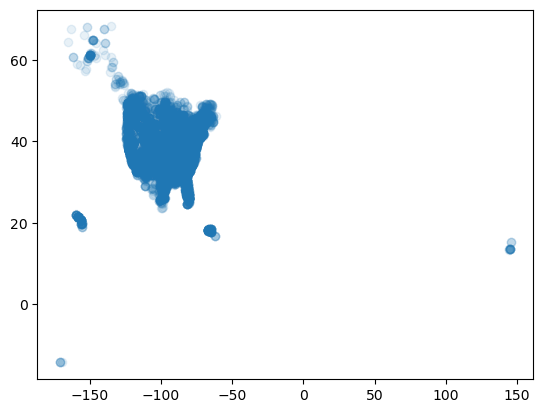

In [30]:
# poorly plot lat and long as a proof of concept
plt.scatter(commercial['lon_decimal'], commercial['lat_decimal'], alpha=0.1);

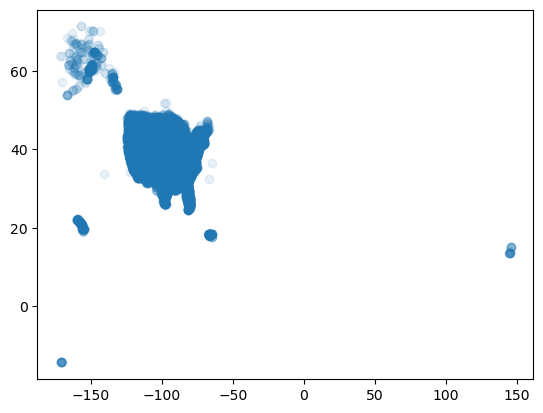

In [29]:
plt.scatter(edu['lon_decimal'], edu['lat_decimal'], alpha=0.1);

Cue patriotic music

In [34]:
print(commercial.shape, edu.shape)

(12162, 30) (18085, 30)


In [35]:
# add a column to each dataframe to indicate commercial or edu
commercial['commercial'] = 1
edu['commercial'] = 0
# combine the dataframes
df = pd.concat([commercial, edu], ignore_index=True)


,Callsign,Frequency,Service,Channel,DA or ND,FM Station Class,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID,lat_decimal,lon_decimal,commercial
0,K201CL,88.1 MHz,FX,201,ND,D,LIC,TATITLEK,AK,US,BLFT-20101001AHK,-. kW,0.023 kW,0.0,0.0,65237,"TERMINAL RADIO, INC.",0.00 km,0.00 mi,0.00 deg,0.0 m,42. m,31326,-,-,12. m,1364607,a751fb3559f54d08aef5c1b6063ebeb7,60.868333,-146.681722,1
1,WSJL,88.1 MHz,FM,201,DA,A,LIC,BESSEMER,AL,US,BLED-20130322AHX,-. kW,6. kW,0.0,98.0,88660,"ELIJAH RADIO, INC.",0.00 km,0.00 mi,0.00 deg,0.0 m,254. m,13374,0.,1019712,66. m,1564228,4974067c949a4731af1ec1b6063ebeb7,33.395944,-87.018611,1
2,KBAP,88.1 MHz,FM,201,ND,A,LIC,BATESVILLE,AR,US,BLED-20101213AHT,0.25 kW,-. kW,39.0,0.0,175536,TONY V. HAMMACK MINISTRIES,0.00 km,0.00 mi,0.00 deg,181. m,0.0 m,-,-,-,17. m,1411889,8f5d3abb1cb142f08aefc1b6063ebeb7,35.797833,-91.671250,1
3,K201ER,88.1 MHz,FX,201,ND,D,LIC,HOLBROOK,AZ,US,BLFT-20000128ADH,0.05 kW,0.05 kW,29.0,0.0,89665,"ADVANCE MINISTRIES, INC. D/B/A/ NEW LIFE CHRIS...",0.00 km,0.00 mi,0.00 deg,1624. m,1624.0 m,30889,-,1002376,30. m,492632,95888c9301ea4b3a9fbcc1b6063ebeb7,34.918083,-110.140944,1
4,KECG,88.1 MHz,FM,201,ND,D,LIC,EL CERRITO,CA,US,BLED-20050727AAH,0.017 kW,0.017 kW,-29.0,-29.0,19081,WEST CONTRA COSTA UNIFIED SCHOOL DISTRICT,0.00 km,0.00 mi,0.00 deg,63. m,63.0 m,-,-,-,29. m,1076164,8d79f211f9c44b71bec3c1b6063ebeb7,37.905472,-122.293833,1


In [39]:
# any duplicates?
df.duplicated().sum()


5

In [40]:
# where are the duplicates?
df[df.duplicated(keep=False)].sort_values(by='Facility ID Number (unique to each station)')

,Callsign,Frequency,Service,Channel,DA or ND,FM Station Class,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID,lat_decimal,lon_decimal,commercial
7676,KOOO,101.9 MHz,FM,270,ND,C0,LIC,LA VISTA,NE,US,BLH-20120203ABL,100. kW,100. kW,365.0,365.0,35067,"NRG LICENSE SUB, LLC",0.00 km,0.00 mi,0.00 deg,716. m,716.0 m,-,-,1211195,354. m,1473614,8e27bfd8980c46e89f9ac1b6063ebeb7,41.050278,-96.192806,1
7677,KOOO,101.9 MHz,FM,270,ND,C0,LIC,LA VISTA,NE,US,BLH-20120203ABL,100. kW,100. kW,365.0,365.0,35067,"NRG LICENSE SUB, LLC",0.00 km,0.00 mi,0.00 deg,716. m,716.0 m,-,-,1211195,354. m,1473614,8e27bfd8980c46e89f9ac1b6063ebeb7,41.050278,-96.192806,1
13029,KSBR,88.5 MHz,FM,203,DA,B1,APP,MISSION VIEJO,CA,US,0000206319,1.8 kW,1.8 kW,198.0,198.0,58529,SOUTH ORANGE COUNTY COMMUNITY COLLEGE DISTRICT,0.00 km,0.00 mi,0.00 deg,361. m,361.0 m,-,-.,-,19. m,206319,25076f91841b8afe0184344eb2e208d9,33.502944,-117.603194,0
13030,KSBR,88.5 MHz,FM,203,DA,B1,APP,MISSION VIEJO,CA,US,0000206319,1.8 kW,1.8 kW,198.0,198.0,58529,SOUTH ORANGE COUNTY COMMUNITY COLLEGE DISTRICT,0.00 km,0.00 mi,0.00 deg,361. m,361.0 m,-,-.,-,19. m,206319,25076f91841b8afe0184344eb2e208d9,33.502944,-117.603194,0
11575,WNUS,107.1 MHz,FM,296,ND,A,LIC,BELPRE,OH,US,BLH-20160720AAA,3.8 kW,3.8 kW,127.0,127.0,67465,"IHM LICENSES, LLC",0.00 km,0.00 mi,0.00 deg,360. m,360.0 m,-,-,1034106,50. m,1733860,a9243d23d9f14f84bab7c1b6063ebeb7,39.338333,-81.500000,1
11576,WNUS,107.1 MHz,FM,296,ND,A,LIC,BELPRE,OH,US,BLH-20160720AAA,3.8 kW,3.8 kW,127.0,127.0,67465,"IHM LICENSES, LLC",0.00 km,0.00 mi,0.00 deg,360. m,360.0 m,-,-,1034106,50. m,1733860,a9243d23d9f14f84bab7c1b6063ebeb7,39.338333,-81.500000,1
762,-,92.3 MHz,FA,222,ND,B,LIC,CABORCA,SO,MX,-,- kW,- kW,-,-,94172,-,0.00 km,0.00 mi,0.00 deg,- m,- m,-,-,-,0. m,288320,12-2019-09-19,30.697333,-112.158722,1
763,-,92.3 MHz,FA,222,ND,B,LIC,CABORCA,SO,MX,-,- kW,- kW,-,-,94172,-,0.00 km,0.00 mi,0.00 deg,- m,- m,-,-,-,0. m,288320,12-2019-09-19,30.697333,-112.158722,1
11192,CJMTFM,106.5 MHz,FA,293,ND,A,LIC,CANMORE,AB,CA,-,- kW,- kW,-,-,94960,-,0.00 km,0.00 mi,0.00 deg,- m,- m,-,-,-,1382. m,291022,2002-2019-09-19,51.078944,-115.326306,1
11193,CJMTFM,106.5 MHz,FA,293,ND,A,LIC,CANMORE,AB,CA,-,- kW,- kW,-,-,94960,-,0.00 km,0.00 mi,0.00 deg,- m,- m,-,-,-,1382. m,291022,2002-2019-09-19,51.078944,-115.326306,1


In [41]:
# all duplicates are consectutive intexes I think they are truly duplicates
df.drop_duplicates(inplace=True)

In [42]:
df.shape

(30242, 31)

In [43]:
df.head()

,Callsign,Frequency,Service,Channel,DA or ND,FM Station Class,FM Status,City,State,Country,"File Number (Application, Construction Permit or License) or Docket Number (Rulemaking)",Effective Radiated Power horizontally,Effective Radiated Power vertically,Antenna Height Above Average Terrain (HAAT) -- horizontal polarization,Antenna Height Above Average Terrain (HAAT) -- vertical polarization,Facility ID Number (unique to each station),Licensee or Permittee,"Kilometers distant (radius) from entered latitude, longitude","Miles distant (radius) from entered latitude, longitude","Azimuth, looking from center Lat, Lon to this records Lat, Lon",Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Horizontally Polarized - meters,Antenna Radiation Center Above Mean Sea Level (RCAMSL) - Vertically Polarized - meters,Directional Antenna ID Number,Directional Antenna Pattern Rotation (degrees),Antenna Structure Registration Number,Height of antenna radiation center above ground level (maximum) (physical center of the antenna),Application ID number (from CDBS database),LMS Application ID,lat_decimal,lon_decimal,commercial
0,K201CL,88.1 MHz,FX,201,ND,D,LIC,TATITLEK,AK,US,BLFT-20101001AHK,-. kW,0.023 kW,0.0,0.0,65237,"TERMINAL RADIO, INC.",0.00 km,0.00 mi,0.00 deg,0.0 m,42. m,31326,-,-,12. m,1364607,a751fb3559f54d08aef5c1b6063ebeb7,60.868333,-146.681722,1
1,WSJL,88.1 MHz,FM,201,DA,A,LIC,BESSEMER,AL,US,BLED-20130322AHX,-. kW,6. kW,0.0,98.0,88660,"ELIJAH RADIO, INC.",0.00 km,0.00 mi,0.00 deg,0.0 m,254. m,13374,0.,1019712,66. m,1564228,4974067c949a4731af1ec1b6063ebeb7,33.395944,-87.018611,1
2,KBAP,88.1 MHz,FM,201,ND,A,LIC,BATESVILLE,AR,US,BLED-20101213AHT,0.25 kW,-. kW,39.0,0.0,175536,TONY V. HAMMACK MINISTRIES,0.00 km,0.00 mi,0.00 deg,181. m,0.0 m,-,-,-,17. m,1411889,8f5d3abb1cb142f08aefc1b6063ebeb7,35.797833,-91.671250,1
3,K201ER,88.1 MHz,FX,201,ND,D,LIC,HOLBROOK,AZ,US,BLFT-20000128ADH,0.05 kW,0.05 kW,29.0,0.0,89665,"ADVANCE MINISTRIES, INC. D/B/A/ NEW LIFE CHRIS...",0.00 km,0.00 mi,0.00 deg,1624. m,1624.0 m,30889,-,1002376,30. m,492632,95888c9301ea4b3a9fbcc1b6063ebeb7,34.918083,-110.140944,1
4,KECG,88.1 MHz,FM,201,ND,D,LIC,EL CERRITO,CA,US,BLED-20050727AAH,0.017 kW,0.017 kW,-29.0,-29.0,19081,WEST CONTRA COSTA UNIFIED SCHOOL DISTRICT,0.00 km,0.00 mi,0.00 deg,63. m,63.0 m,-,-,-,29. m,1076164,8d79f211f9c44b71bec3c1b6063ebeb7,37.905472,-122.293833,1


In [44]:
# save the dataframe
df.to_csv('../data/labeled_decimal_all_FM.csv', index=False)